**Intervalo de Confiança - COVID 19**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dataset3 = pd.read_csv('DatasetCovidTratado2.csv',encoding='utf-8')

In [12]:
#Features/Previsores e a Target/Classe
previsores = dataset3.iloc[:, 0:96].values # da primeira coluna a penultima
classe     = dataset3.iloc[:,96].values # Coluna Classif OMS

previsores = pd.DataFrame(previsores)

In [13]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,classe,test_size=0.30, random_state=0)

In [ ]:
#2) No Grid Search não precisa dessas duas linhas linhas abaixo, estudar melhor, precisa refazer:

#kf = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#for train_index, test_index in kf.split(previsores,classe):

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,ShuffleSplit

kf = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

for train_index, test_index in kf.split(previsores,classe):
  param_grid = {
      'bootstrap': [True, False],
      'max_depth': [20,25,100],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [3, 4, 5],
      'min_samples_split': [2, 5],
      'n_estimators': [100, 200]
  }

  classifier = RandomForestClassifier()
  grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                            cv = 10, n_jobs = -1, verbose = 2)
  
  X_train, X_test = previsores[train_index], previsores[test_index]
  y_train, y_test = classe[train_index], classe[test_index]
  
  grid_search.fit(X_train, y_train)
  print(grid_search.best_params_)

In [ ]:
# 3) Na Validação cruzada do kfold não usar o test_size e não precisa da estrutura de repetição for

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

modelLR = LogisticRegression(random_state=1)

# Aqui vou guardar as matrizes de confusão
conf_matrix_list_of_arrays = []
# Usar kfold para separar os índices de treino e de teste

kf = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

# Guardar as precisões de 10 rodadas
precisao_lr = []
logistic_models = []

logistic_models_grid = []
logistic_models_grid.append(modelLR)

# loop das 10 rodadas
for train_index, test_index in kf.split(previsores,classe):
  #Separação em treino e teste
  X_train, X_test = previsores[train_index], previsores[test_index]
  y_train, y_test = classe[train_index], classe[test_index]
  # Treinar o modelo
  modelLR.fit(X_train, y_train)
  logistic_models.append(modelLR)
  # Calcular a matriz de confusão
  conf_matrix = confusion_matrix(y_test,modelLR.predict(X_test))
  # Guardar a matriz de confusão
  conf_matrix_list_of_arrays.append(conf_matrix)
  # Guardar a precisão
  precisao_lr.append( accuracy_score(y_test, modelLR.predict(X_test)) )

# imprimir o array de precisões
print(precisao_lr)

# imprimir as matrizes de confusão (nesse caso estou imprimindo a matriz que o modelo teve a melhor acurácia)
print(conf_matrix_list_of_arrays[1])

target_names = np.unique(classe)
print(classification_report(y_test,logistic_models[2].predict(X_test), target_names=target_names))


[0.7432432432432432, 0.7432432432432432, 0.7567567567567568, 0.6486486486486487, 0.7297297297297297, 0.7432432432432432, 0.7567567567567568, 0.7162162162162162, 0.7972972972972973, 0.7162162162162162]
[[15 14  0]
 [ 0 40  0]
 [ 4  1  0]]
              precision    recall  f1-score   support

       GRAVE       0.73      0.53      0.62        30
    MODERADO       0.71      0.97      0.82        38
       OBITO       0.00      0.00      0.00         6

    accuracy                           0.72        74
   macro avg       0.48      0.50      0.48        74
weighted avg       0.66      0.72      0.67        74



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

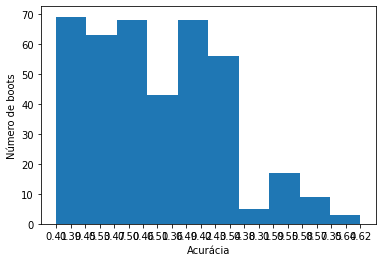

Intervalo de confiança : [0.39,0.58]


In [ ]:
import random
import numpy as np
import plotly.express as px

# Intervalo de confiança da acurácia da regressão logística

# cria boot de acordo com as regras do artigo : 1- size_test= size_boot , 2- repetições permitidas
#vai criar uma base de dados nova mais cada entrada é uma entrada aleatoria podendo repetição
def new_boot(dataset_treino):
  boot = []
  
  c = 0
  while c< len(dataset_treino):
    boot.append( dataset_treino[np.random.randint(0,len(dataset_treino))] )
    c = c+1

  return boot

# Pega a acurácia de um boot
def pegar_acuracia_do_relatorio(boot):
  acuracia = classification_report(y_test,logistic_models[2].predict(boot), target_names=target_names)
  acuracia_string = str(acuracia)
  empassant = "accuracy                           "
  index_acuracia = acuracia_string.find(empassant)  
  x = len(empassant)
  acuracia_valor =  acuracia_string[index_acuracia +x:index_acuracia +x+4]                       
  
  return acuracia_valor

# calcula a distribuição dos boots
  
numero_boots = 401
lista_boots = []
contador = 0

while contador < numero_boots:
  lista_boots.append(pegar_acuracia_do_relatorio(new_boot(X_test)))
  contador =contador +1

plt.hist(lista_boots) 
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show() 

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")

# Observação, de acordo com o teorema do limite central, quanto maior o número de boots, mais a distribuição gaussiana ficará melhor definida.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# rede neural (nesse ponto tem que experimentar outras arquiteturas da rede #hidden_layer_sizes)
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64,64,64), max_iter = 100000, random_state=0)

# Aqui vou guardar as matrizes de confusão
conf_matrix_list_of_arrays = []
# Usar kfold para separar os índices de treino e de teste

#kf = KFold(n_splits=5, random_state=10, shuffle=True)

kf = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

# Guardar as precisões de 10 rodadas
precisao_neu = []
neural_models = []

neural_models_grid = []
neural_models_grid.append(model)

# loop das 10 rodadas
for train_index, test_index in kf.split(previsores,classe):
  #Separação em treino e teste
  X_train, X_test = previsores[train_index], previsores[test_index]
  y_train, y_test = classe[train_index], classe[test_index]
  # Treinar o modelo
  model.fit(X_train, y_train)
  neural_models.append(model)
  # Calcular a matriz de confusão
  #conf_matrix = confusion_matrix(lb.inverse_transform(y_test),lb.inverse_transform(model.predict(X_test)))
  conf_matrix = confusion_matrix(y_test,modelLR.predict(X_test))
  # Guardar a matriz de confusão
  conf_matrix_list_of_arrays.append(conf_matrix)
  # Guardar a precisão
  #precisao_neu.append( accuracy_score(lb.inverse_transform(y_test), lb.inverse_transform(model.predict(X_test))) )
  precisao_neu.append( accuracy_score(y_test, modelLR.predict(X_test)) )
# imprimir o array de precisões
print(precisao_neu)
# imprimir as matrizes de confusão (nesse caso estou imprimindo a matriz que o modelo teve a melhor acurácia)
print(conf_matrix_list_of_arrays[1])

target_names = np.unique(classe)
print(classification_report(y_test,neural_models[1].predict(X_test), target_names=target_names))

[0.8783783783783784, 0.9864864864864865, 0.918918918918919, 0.8648648648648649, 0.9324324324324325, 0.918918918918919, 0.8783783783783784, 0.9594594594594594, 0.9324324324324325, 0.7162162162162162]
[[28  1  0]
 [ 0 40  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

       GRAVE       0.61      0.47      0.53        30
    MODERADO       0.71      0.84      0.77        38
       OBITO       0.00      0.00      0.00         6

    accuracy                           0.62        74
   macro avg       0.44      0.44      0.43        74
weighted avg       0.61      0.62      0.61        74



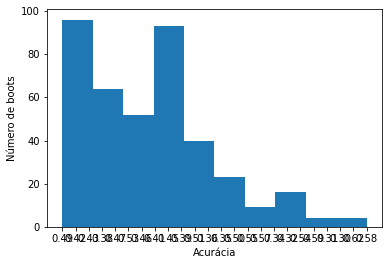

Intervalo de confiança : [0.3200000000000002,0.54]


In [ ]:
import random
import numpy as np
import plotly.express as px

# Intervalo de confiança da acurácia da rede neural

# cria boot de acordo com as regras do artigo : 1- size_test= size_boot , 2- repetições permitidas
def new_boot(dataset_treino):
  boot = []
  
  c = 0
  while c< len(dataset_treino):
    boot.append( dataset_treino[np.random.randint(0,len(dataset_treino))] )
    c = c+1

  return boot

# Pega a acurácia de um boot
def pegar_acuracia_do_relatorio(boot):
  acuracia = classification_report(y_test,neural_models[1].predict(boot), target_names=target_names)
  acuracia_string = str(acuracia)
  empassant = "accuracy                           "
  index_acuracia = acuracia_string.find(empassant)  
  x = len(empassant)
  acuracia_valor =  acuracia_string[index_acuracia +x:index_acuracia +x+4]                       
  
  return acuracia_valor

# calcula a distribuição dos boots
  
numero_boots = 401
lista_boots = []
contador = 0

while contador < numero_boots:
  lista_boots.append(pegar_acuracia_do_relatorio(new_boot(X_test)))
  contador =contador +1

plt.hist(lista_boots) 
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show() 

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")

# Observação, de acordo com o teorema do limite central, quanto maior o número de boots, mais a distribuição gaussiana ficará melhor definida.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# rede neural (nesse ponto tem que experimentar outras arquiteturas da rede #hidden_layer_sizes)
modelRF = RandomForestClassifier(bootstrap = False, max_depth = 100, 
                                    max_features = 'sqrt', min_samples_leaf = 3,
                                    min_samples_split = 5, n_estimators = 100)

# Aqui vou guardar as matrizes de confusão
conf_matrix_list_of_arrays = []
# Usar kfold para separar os índices de treino e de teste

#kf = KFold(n_splits=5, random_state=10, shuffle=True)

kf = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

# Guardar as precisões de 10 rodadas
precisao_rf = []
florest_models = []

florest_models_grid = []
florest_models_grid.append(modelRF)

# loop das 10 rodadas
for train_index, test_index in kf.split(previsores,classe):
  #Separação em treino e teste
  X_train, X_test = previsores[train_index], previsores[test_index]
  y_train, y_test = classe[train_index], classe[test_index]
  # Treinar o modelo
  modelRF.fit(X_train, y_train)
  florest_models.append(modelRF)
  # Calcular a matriz de confusão
  
  #conf_matrix = confusion_matrix(lb.inverse_transform(y_test),lb.inverse_transform(modelRF.predict(X_test)))
  conf_matrix = confusion_matrix(y_test,modelLR.predict(X_test))

  # Guardar a matriz de confusão
  conf_matrix_list_of_arrays.append(conf_matrix)
  # Guardar a precisão
  #precisao_rf.append( accuracy_score(lb.inverse_transform(y_test), lb.inverse_transform(modelRF.predict(X_test))) )
  precisao_rf.append( accuracy_score(y_test, modelLR.predict(X_test)) )

#Porque validacao cruzada

# imprimir o array de precisões
print(precisao_rf)
# imprimir as matrizes de confusão (nesse caso estou imprimindo a matriz que o modelo teve a melhor acurácia)
print(conf_matrix_list_of_arrays[1])

target_names = np.unique(classe)
print(classification_report(y_test,florest_models[1].predict(X_test), target_names=target_names))

In [ ]:
import random
import numpy as np
import plotly.express as px

# Intervalo de confiança da acurácia da floresta randomica

# cria boot de acordo com as regras do artigo : 1- size_test= size_boot , 2- repetições permitidas
def new_boot(dataset_treino):
  boot = []
  
  c = 0
  while c< len(dataset_treino):
    boot.append( dataset_treino[np.random.randint(0,len(dataset_treino))] )
    c = c+1

  return boot

# Pega a acurácia de um boot
def pegar_acuracia_do_relatorio(boot):
  acuracia = classification_report(y_test,florest_models[1].predict(boot), target_names=target_names)
  acuracia_string = str(acuracia)
  empassant = "accuracy                           "
  index_acuracia = acuracia_string.find(empassant)  
  x = len(empassant)
  acuracia_valor =  acuracia_string[index_acuracia +x:index_acuracia +x+4]                       
  
  return acuracia_valor

# calcula a distribuição dos boots
  
numero_boots = 401
lista_boots = []
contador = 0

while contador < numero_boots:
  lista_boots.append(pegar_acuracia_do_relatorio(new_boot(X_test)))
  contador =contador +1

plt.hist(lista_boots) 
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show() 

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")


# Observação, de acordo com o teorema do limite central, quanto maior o número de boots, mais a distribuição gaussiana ficará melhor definida.



In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# esse for é usado pra escolher qual dos modelos treinados rejeita a hipótese nula
for rf in florest_models_grid:
  for rl in logistic_models_grid:
    #t, p = paired_ttest_5x2cv(estimator1=rl,estimator2=rf,X=previsores, y=lb.inverse_transform(classe))
    t, p = paired_ttest_5x2cv(estimator1=rl,estimator2=rf,X=previsores, y=classe)
    alpha = 0.05

    print('t statistic: %.3f' % t)
    print('aplha ', alpha)
    print('p value: %.3f' % p)

    if p > alpha:
      print("Fail to reject null hypotesis")
    else:
      print("Reject null hypotesis")

t statistic: -3.249
aplha  0.05
p value: 0.023
Reject null hypotesis


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# esse for é usado pra escolher qual dos modelos treinados rejeita a hipótese nula
for rf in florest_models_grid:
  for nc in neural_models_grid:
    t, p = paired_ttest_5x2cv(estimator1=nc,estimator2=rf,X=previsores, y=classe)
    alpha = 0.05

    print('t statistic: %.3f' % t)
    print('aplha ', alpha)
    print('p value: %.3f' % p)

    if p > alpha:
      print("Fail to reject null hypotesis")
    else:
      print("Reject null hypotesis")

t statistic: -2.276
aplha  0.05
p value: 0.072
Fail to reject null hypotesis


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# esse for é usado pra escolher qual dos modelos treinados rejeita a hipótese nula
for rl in logistic_models_grid:
  for nc in neural_models_grid:
    t, p = paired_ttest_5x2cv(estimator1=nc,estimator2=rl,X=previsores, y=classe)
    alpha = 0.05

    print('t statistic: %.3f' % t)
    print('aplha ', alpha)
    print('p value: %.3f' % p)

    if p > alpha:
      print("Fail to reject null hypotesis")
    else:
      print("Reject null hypotesis")

t statistic: -1.064
aplha  0.05
p value: 0.336
Fail to reject null hypotesis
